
## data_month3
#### RICE COOKER| ??? |                                          

In [1]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d =31
time_a = pd.date_range('2016-12-01 00:00:00', periods=5760*(d+1), freq='15S')
# print time_a
time_b = pd.date_range('2016-12-01 00:00:14', periods=5760*(d+1), freq='15S')
# print time_b

clock1 = time_b.strftime("%H:%M:%S")

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

conn1= MySQLdb.connect("localhost","conn","hems")
c1 = conn1.cursor()

####### set databases to empty #########
query_empty = """truncate table data_month3.rice_cooker """ 
c1.execute(query_empty)
print "data_month3.rice_cooker are Empty!!! \n"

query = "SELECT watt FROM collected_info.10_rice_cooker WHERE no >= '%s'   AND no <= '%s'; "% (0,1200)
df = pd.read_sql(query, conn)
# print df.watt[5]


#### Random the turning-on time appliances
def rand_turnon():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    duration_hour1 = ['16'] * 10 +  ['17'] * 60 + ['18'] * 27 + ['19'] * 3
    duration_hour = random.choice(duration_hour1)     
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    off_item = (int(duration_hour)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on appliacne on",duration_hour,":",duration_min,":",duration_sec,"equal to",off_item,"items"
    return off_item

 
#### Random the off-duration appliances 
def rand_duration():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(40, 59)
    duration_hour1 = ['0'] * 27 + ['0'] * 70 + ['1'] * 3
    duration_hour = random.choice(duration_hour1)       
    seconds = (int(duration_hour)*3600)+(duration_min*60)+duration_sec
    no_item = seconds/15
    print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items"
    return no_item


a = 0
days = 0
j = 0
i = 0
do_days1 = ['5'] * 3 + ['6'] * 55 + ['0'] * 42
do_days = random.choice(do_days1)
dict = {'5': 'Friday', '6': 'Saturday', '0': 'Sunday'}
print "| use rice_cooker in next week on | ... ",dict[do_days]
off_item = rand_turnon()  
no_item = rand_duration()


while (j <= (5760*d)-1):
    no_days = int(time_b[j].strftime('%w'))  # find 0-6 of no_days

    
    if (no_days == 0 and clock1[j] == u'23:59:59'):    #if no_day is SUNDAY at 23:59:59 check d0_days in week 
        do_days1 = ['5'] * 3 + ['6'] * 55 + ['0'] * 42   #fri-sat-sun
        do_days = random.choice(do_days1) 
        dict = {'5': 'Friday', '6': 'Saturday', '0': 'Sunday'}
        print "\n| use rice_cooker in next week on | ... ",dict[do_days]
        off_item = rand_turnon()  
        no_item = rand_duration()


    if (int(do_days) == no_days):
        i= 0  
        c1.execute("INSERT INTO data_month3.rice_cooker (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
        while (off_item+(5760*(days-1))<= j <= (no_item+off_item)+(5760*(days-1))):
            
            if (i >= len(df)):
                i = 400   
                
            c1.execute("INSERT INTO data_month3.rice_cooker (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
            conn1.commit()
            i += 1 
            j += 1     
            print "|",j,
            

    else : 
        c1.execute("INSERT INTO data_month3.rice_cooker (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
        
    if (j%5760 == 0):
        print "\nDays :",days ,":",time_b[j].strftime('%a')
        days +=1        
    j += 1
    conn1.commit()
print "DONE!"

 


data_month3.rice_cooker are Empty!!! 

| use rice_cooker in next week on | ...  Sunday
time to turn-on appliacne on 17 : 40 : 47 equal to 4243 items
consuming the appliance 0 hours 43 minutes 4 seconds that equal to 2584 seconds or 172 items

Days : 0 : Thu

Days : 1 : Fri

Days : 2 : Sat

Days : 3 : Sun
| 21524 | 21525 | 21526 | 21527 | 21528 | 21529 | 21530 | 21531 | 21532 | 21533 | 21534 | 21535 | 21536 | 21537 | 21538 | 21539 | 21540 | 21541 | 21542 | 21543 | 21544 | 21545 | 21546 | 21547 | 21548 | 21549 | 21550 | 21551 | 21552 | 21553 | 21554 | 21555 | 21556 | 21557 | 21558 | 21559 | 21560 | 21561 | 21562 | 21563 | 21564 | 21565 | 21566 | 21567 | 21568 | 21569 | 21570 | 21571 | 21572 | 21573 | 21574 | 21575 | 21576 | 21577 | 21578 | 21579 | 21580 | 21581 | 21582 | 21583 | 21584 | 21585 | 21586 | 21587 | 21588 | 21589 | 21590 | 21591 | 21592 | 21593 | 21594 | 21595 | 21596 | 21597 | 21598 | 21599 | 21600 | 21601 | 21602 | 21603 | 21604 | 21605 | 21606 | 21607 | 21608 | 21609 | 2161

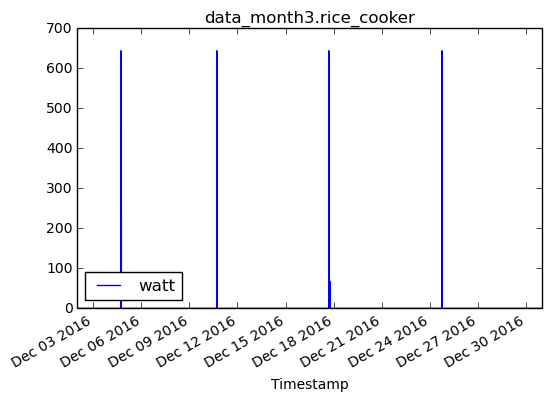

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  


# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT Timestamp,watt FROM data_month3.rice_cooker WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[5760],time_b[5760*30])
df = pd.read_sql(query, conn1, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title('data_month3.rice_cooker')
df.plot(ax=ax )
plt.show()
# df.to_csv('file.csv')
# print len(df)
